In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show 
import seaborn as sns 
import math
import cmcrameri.cm as cmc
from cmcrameri import cm
import scipy.stats as stats
import plotly.express as px

In [29]:
df_abs=pd.read_pickle('df_orientation_theta1N_abs.pkl') #df_labels_2clusters_test_abs #df_orientation_theta1N_abs.pkl
df_featuresE9_abs = df_abs[df_abs['condition'].isin(['E9WT'])]
df_featuresE9_abs

,condition,embryo,orientation,theta1N,labels_3clusters,labels_2clusters
0,E9WT,1,0.478775,0.753534,0,1
1,E9WT,1,0.221016,0.128907,1,1
2,E9WT,1,0.440536,0.133679,1,1
3,E9WT,1,0.348956,0.130873,1,1
4,E9WT,1,0.129507,0.196935,1,1
...,...,...,...,...,...,...
8542,E9WT,6,0.671960,0.630041,1,1
8543,E9WT,6,0.203422,0.143998,1,1
8544,E9WT,6,0.509789,0.388703,1,1
8545,E9WT,6,0.346324,0.145875,1,1


<ipython-input-3-7c32a49bac8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_featuresE9_abs['orientation'] = np.degrees(df_featuresE9_abs['orientation'])
<ipython-input-3-7c32a49bac8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_featuresE9_abs['theta1N'] = np.degrees(df_featuresE9_abs['theta1N'])


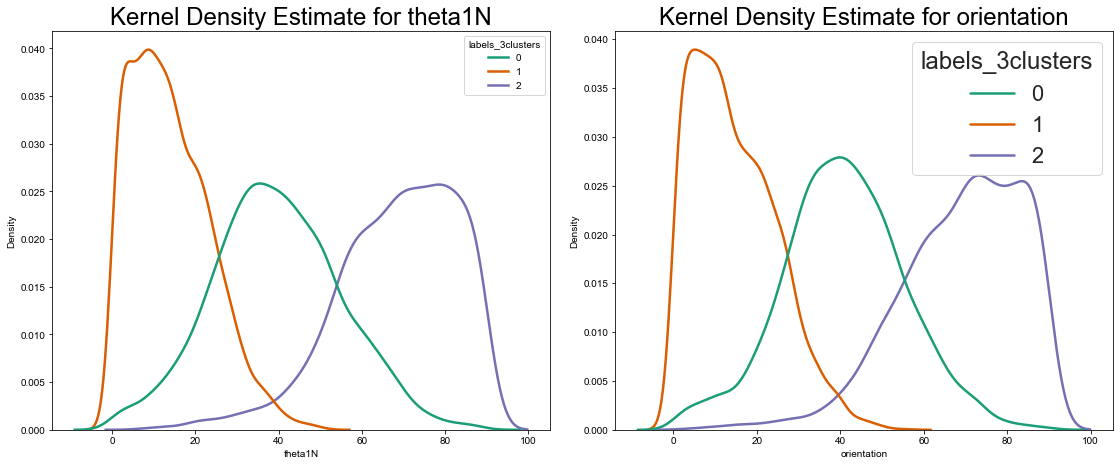

In [3]:
df_featuresE9_abs['orientation'] = np.degrees(df_featuresE9_abs['orientation'])
df_featuresE9_abs['theta1N'] = np.degrees(df_featuresE9_abs['theta1N'])
#df_featuresE9_abs['theta1N'] = ((df_featuresE9_abs['theta1N'] + 90) % 180) - 90
attributes = ["theta1N", "orientation"]

# Create subplots grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Iterate over attributes and plot on corresponding subplot
for i, attr in enumerate(attributes):
    sns.kdeplot(data=df_featuresE9_abs, x=attr, hue="labels_3clusters", common_norm=False, palette=['#1b9e77', '#d95f02', '#7570b3'], linewidth=2.5, ax=axes[i])
    sns.set(font_scale=2)
    sns.set_style("white")
    axes[i].set_title(f"Kernel Density Estimate for {attr}")
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()

# Optionally save the figure
#plt.savefig("AAbsolute values test 3c.png", dpi=200)

# Show plot
plt.show()

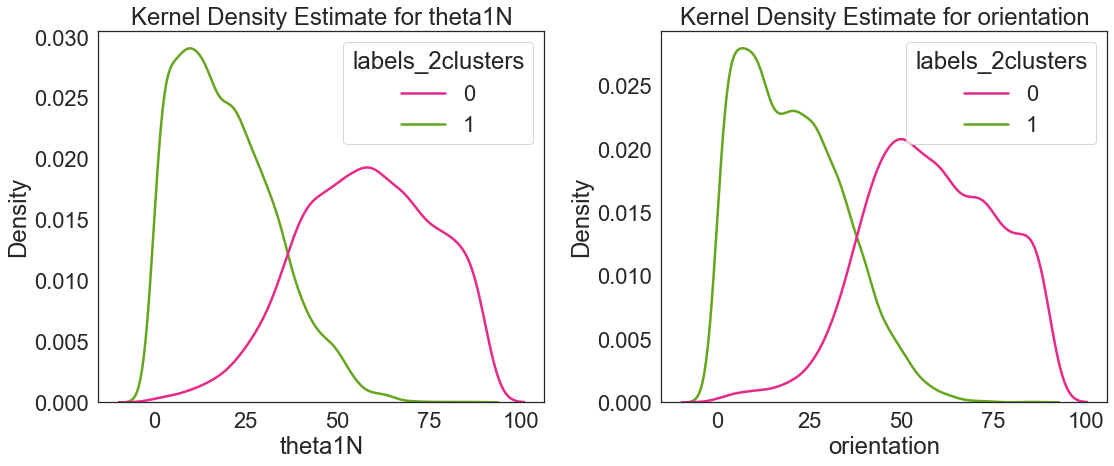

In [4]:
import matplotlib.pyplot as plt #'#E7298A', '#66A61E'
import seaborn as sns

attributes = ["theta1N", "orientation"]

# Create subplots grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Iterate over attributes and plot on corresponding subplot
for i, attr in enumerate(attributes):
    sns.kdeplot(data=df_featuresE9_abs, x=attr, hue="labels_2clusters", common_norm=False, palette=['#E7298A', '#66A61E'], linewidth=2.5, ax=axes[i])
    sns.set(font_scale=2)
    sns.set_style("white")
    axes[i].set_title(f"Kernel Density Estimate for {attr}")
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()

# Optionally save the figure
#plt.savefig("AAbsolute values test 2c.png", dpi=200)

# Show plot
plt.show()

In [33]:
df_abs=pd.read_pickle('df_labels_2clusters_test_abs.pkl')
df_abs

,id_cell,pc_coord4,pc_coord2,condition,embryo,label
0,3,0.109743,-1.835066,E9WT,1,1
1,4,-1.239605,1.983889,E9WT,1,1
2,5,-1.366401,3.076985,E9WT,1,1
3,6,-1.657429,1.373902,E9WT,1,1
4,7,-0.652803,-0.578603,E9WT,1,1
...,...,...,...,...,...,...
5556,1533,-1.584900,0.039650,E9Nkx,25,1
5557,1534,-0.238913,1.216564,E9Nkx,25,1
5558,1535,-1.689831,-1.204053,E9Nkx,25,1
5559,1536,0.077539,-1.649825,E9Nkx,25,1


In [50]:
df_abs=pd.read_pickle('df_labels_2clusters_test_abs.pkl')
df = pd.read_csv('pooldata_non_normalised.csv')

df_abs_filtered = df_abs[df_abs["embryo"]==1]
df_filtered = df[df["Nb_embryo"]==1]
df_filtered = df_filtered.rename(columns={'local_id_cells':'id_cell'})

In [52]:
merged_df = pd.merge(df_abs_filtered, df_filtered, on="id_cell")
merged_df

,id_cell,pc_coord4,pc_coord2,condition,embryo,label,Unnamed: 0,area_cells,center_x_cells,center_y_cells,...,perimeter_length,local_id_of_bonds,pressures,elongation,theta1N,ratio_lambda,eccentricity,n_neighbors,Nb_embryo,type
0,3,0.109743,-1.835066,E9WT,1,1,2,122,24.975410,817.786885,...,51.213203,176#177#178,0.019273,0.857143,0.753534,0.107335,0.543217,3.0,1,0
1,4,-1.239605,1.983889,E9WT,1,1,3,869,33.761795,842.621404,...,142.852814,177#179#180#181#182#183,-0.008199,0.708333,0.128907,0.658197,0.260831,6.0,1,0
2,5,-1.366401,3.076985,E9WT,1,1,4,856,37.967290,664.415888,...,140.468037,184#185#186#187#188#189#141#190,-0.035611,0.411765,0.133679,0.393390,0.943897,4.0,1,0
3,6,-1.657429,1.373902,E9WT,1,1,5,662,37.105740,978.809668,...,132.124892,192#193#194#191,0.013451,0.375000,-0.130873,0.218346,0.806600,7.0,1,0
4,7,-0.652803,-0.578603,E9WT,1,1,6,303,33.696370,626.224422,...,76.183766,195#196#197#198#141,-0.034522,0.653846,0.196935,0.676989,0.344984,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1844,-1.014896,-0.467178,E9WT,1,1,1843,276,978.731884,514.858696,...,83.497475,5425#5474#5475#5476#5465#5401,-0.014968,0.531250,-0.283696,0.302263,0.866885,6.0,1,0
1838,1845,-0.963354,-0.447423,E9WT,1,1,1844,348,982.025862,893.293103,...,85.840620,5477#5478#5433#5418#5467,0.006186,0.633333,-0.274101,0.350209,0.799743,5.0,1,0
1839,1846,-1.474562,-0.104458,E9WT,1,1,1845,401,984.241895,920.197008,...,95.497475,5472#5442#5478#5479#5434,-0.006707,0.485714,0.059470,0.449779,0.724102,5.0,1,0
1840,1847,-1.168124,-0.670021,E9WT,1,1,1846,292,983.534247,569.195206,...,74.426407,5459#5480#5481#5403,-0.004039,0.379310,0.214986,0.302616,0.841512,4.0,1,0


In [49]:
df_filtered

,Unnamed: 0,local_id_cells,area_cells,center_x_cells,center_y_cells,orientation_cells,perimeter_length,local_id_of_bonds,pressures,elongation,theta1N,ratio_lambda,eccentricity,n_neighbors,Nb_embryo,type
0,1,2,148,27.432432,901.250000,2.274860,58.083261,174#175,-0.038109,0.875000,NaN,NaN,0.747200,2.0,1,0
1,2,3,122,24.975410,817.786885,2.049571,51.213203,176#177#178,0.019273,0.857143,0.753534,0.107335,0.543217,3.0,1,0
2,3,4,869,33.761795,842.621404,1.791812,142.852814,177#179#180#181#182#183,-0.008199,0.708333,0.128907,0.658197,0.260831,6.0,1,0
3,4,5,856,37.967290,664.415888,2.011333,140.468037,184#185#186#187#188#189#141#190,-0.035611,0.411765,0.133679,0.393390,0.943897,4.0,1,0
4,5,6,662,37.105740,978.809668,1.919752,132.124892,192#193#194#191,0.013451,0.375000,-0.130873,0.218346,0.806600,7.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,1848,1849,470,990.023404,692.253191,1.691573,92.325902,5451#5483#5484#5468#5485,-0.011681,0.484848,0.049830,0.533578,0.669979,5.0,1,0
1848,1849,1850,338,989.038462,544.224852,0.736919,93.012193,5476#5480#5402#5486#5487,-0.036625,0.857143,-1.032570,0.957296,0.666291,3.0,1,0
1849,1850,1851,159,984.830189,712.245283,1.408159,57.941125,5488#5469#5485,0.074218,0.523810,-0.054552,0.229802,0.296269,5.0,1,0
1850,1851,1852,209,988.650718,669.349282,1.370447,62.183766,5489#5450#5483,0.058986,0.476190,-0.169536,0.284423,0.517815,3.0,1,0


In [48]:
df_abs_filtered

,id_cell,pc_coord4,pc_coord2,condition,embryo,label
0,3,0.109743,-1.835066,E9WT,1,1
1,4,-1.239605,1.983889,E9WT,1,1
2,5,-1.366401,3.076985,E9WT,1,1
3,6,-1.657429,1.373902,E9WT,1,1
4,7,-0.652803,-0.578603,E9WT,1,1
...,...,...,...,...,...,...
1837,1844,-1.014896,-0.467178,E9WT,1,1
1838,1845,-0.963354,-0.447423,E9WT,1,1
1839,1846,-1.474562,-0.104458,E9WT,1,1
1840,1847,-1.168124,-0.670021,E9WT,1,1


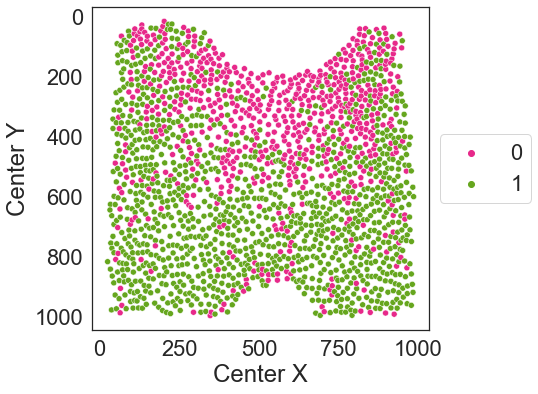

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figsize as needed
plt.figure(figsize=(8, 6))

# Create the scatter plot
ax = sns.scatterplot(data=merged_df[merged_df['embryo'] == 1], x="center_x_cells", y="center_y_cells",
                     hue='label', palette=['#E7298A', '#66A61E'])

# Invert the y-axis
ax.invert_yaxis()

# Set axis labels
ax.set_xlabel('Center X')
ax.set_ylabel('Center Y')

# Set the legend location
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and show the plot
plt.savefig(f"cluster_1-2_plot_2labels.png",dpi=300)
plt.tight_layout()
plt.show()

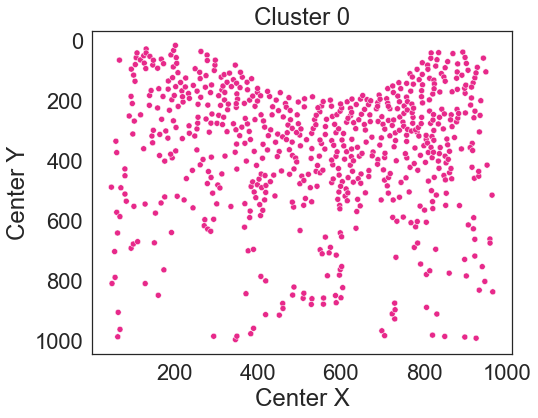

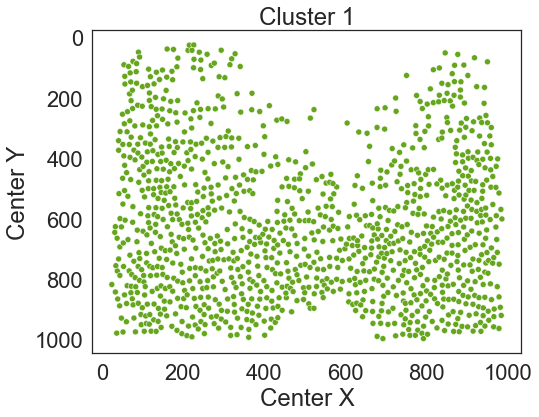

In [68]:
# Filter data for each cluster
cluster_0 = merged_df[(merged_df['embryo'] == 1) & (merged_df['label'] == 0)]
cluster_1 = merged_df[(merged_df['embryo'] == 1) & (merged_df['label'] == 1)]

# Create a scatter plot for cluster 0
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=cluster_0, x="center_x_cells", y="center_y_cells", hue='label', palette=['#E7298A'])
ax.invert_yaxis()
ax.set_xlabel('Center X')
ax.set_ylabel('Center Y')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
plt.tight_layout()
plt.title("Cluster 0")
plt.savefig("cluster_0_plot_2labels.png", dpi=300)
plt.show()

# Create a scatter plot for cluster 1
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=cluster_1, x="center_x_cells", y="center_y_cells", hue='label', palette=['#66A61E'])
ax.invert_yaxis()
ax.set_xlabel('Center X')
ax.set_ylabel('Center Y')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
plt.tight_layout()
plt.title("Cluster 1")
plt.savefig("cluster_1_plot_2labels.png", dpi=300)
plt.show()
